In [1]:
import random
import matplotlib.pyplot as plt
LENGTH=100
POPULATION_SIZE=200
P_CROSSOVER=0.9
P_MUTATION=0.1
MAX_GENERATIONS=50

In [2]:
RANDOM_SEED=42
random.seed(RANDOM_SEED)

In [3]:
class FitnessMax():
    def __init__(self):
        self.values= 0 
class Individual(list):
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness = FitnessMax()

In [4]:
def oneMaxFitness(individual):
    return sum(individual)

def individualCreator():
    return Individual([random.randint(0, 1) for i in range(LENGTH)])

def populationCreator(n=0):
    return list([individualCreator() for i in range(n)])

In [5]:
population=populationCreator(n=POPULATION_SIZE) 
generationCounter = 0 

In [6]:
fitnessValues=list(map(oneMaxFitness,population))
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values=fitnessValue
    

In [7]:
maxFitnessValues=[]
meanFitnessValues=[]

In [8]:
def clone(value):
    ind=Individual(value[:])
    ind.fitness.values=value.fitness.values
    return ind
def selTournament(population, p_len):
    favorites = []
    for n in range(p_len) :
        i1 =i2 =i3 = 0
        while i1==i2 or i1 == i3 or i2 == i3:
            i1, i2, i3 = random.randint(0, p_len-1), random.randint(0, p_len-1), \
            random.randint(0, p_len -1)
        favorites.append(max([population[i1], population[i2], population[i3]],
                              key=lambda ind: ind.fitness.values)) 
    return favorites 
def cxOnePoint(child1, child2):
    lokus=random.randint(2, len(child1)-3)
    child1[lokus:], child2[lokus:]= child2[lokus:], child1[lokus:]
                                                       
def mutFlipBit(mutant , indpb=0.01):
    for indx in range (len(mutant)):
        if random.random() < indpb:
            mutant[indx] = 0 if mutant[indx] == 1 else 1

In [9]:
fitnessValues=[individual.fitness.values for individual in population]

In [10]:
while max(fitnessValues) < LENGTH and generationCounter < MAX_GENERATIONS:
    generationCounter += 1 
    favorites = selTournament(population, len(population))
    favorites = list(map(clone, favorites))
    for child1, child2 in zip(favorites[::2], favorites[1::2]):
        if random.random() < P_CROSSOVER:
            cxOnePoint(child1, child2)
                                  
    for mutant in favorites:
        if random.random() < P_MUTATION:
            mutFlipBit(mutant, indpb=1.0/LENGTH)
                                        
    freshFitnessValues = list(map(oneMaxFitness, favorites))
    for  individual, fitnessValue in zip(favorites, freshFitnessValues):
        individual.fitness.values = fitnessValue 
                                        
    population[:] = favorites
    fitnessValues = [ind. fitness.values for ind in population]
    
    maxFitness =max(fitnessValues)
    meanFitness =sum(fitnessValues) /len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness) 
    print(f"Поколение {generationCounter}: Макс приспособ.= {maxFitness}, \
        Средняя приспособ.= {meanFitness}") 
    best_index=fitnessValues.index(max(fitnessValues))
    print("Лучший индивидуум=", *population[best_index ], "\n")

Поколение 1: Макс приспособ.= 63,         Средняя приспособ.= 53.53
Лучший индивидуум= 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 

Поколение 2: Макс приспособ.= 66,         Средняя приспособ.= 56.625
Лучший индивидуум= 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 

Поколение 3: Макс приспособ.= 67,         Средняя приспособ.= 59.245
Лучший индивидуум= 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 

Поколение 4: Макс приспособ.= 70,         Средняя приспособ.= 61.97
Лучший индивидуум= 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 

Поколение 31: Макс приспособ.= 98,         Средняя приспособ.= 96.355
Лучший индивидуум= 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

Поколение 32: Макс приспособ.= 99,         Средняя приспособ.= 97.035
Лучший индивидуум= 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

Поколение 33: Макс приспособ.= 100,         Средняя приспособ.= 97.59
Лучший индивидуум= 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 



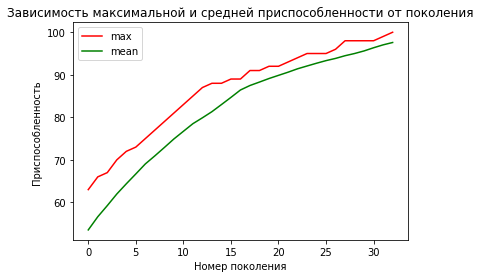

In [11]:
plt.plot(maxFitnessValues, color='red', label='max')
plt.plot(meanFitnessValues, color='green', label='mean')
plt.xlabel('Номер поколения')
plt.ylabel('Приспособленность ')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.legend()
plt.show()